# Funciones de Activacion

* La identidad. $I(x)=x$. Es la mas simple y hace que las redes neuronales sean una regresion lineal. De otra forma la red neuronal simula procesos no lineales.

* La Heaviside (step funcion), funcion de escala

$$H(x) = \left \{ \begin{array}{cc} 1 & \text{si } x \ge 0 \\ 0  & \text{si } x < 0 \end{array} \right . .$$

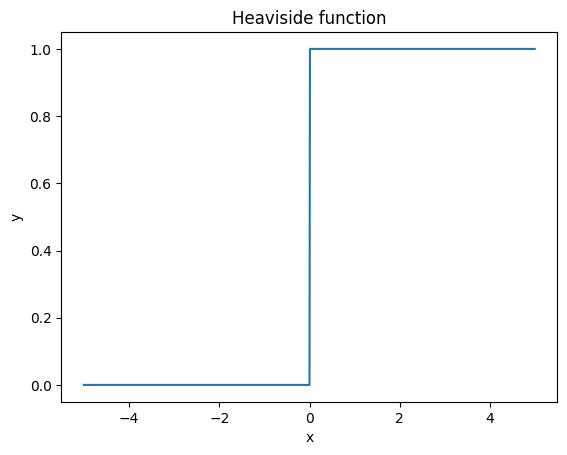

In [3]:
# heaviside
import numpy as np
import matplotlib.pyplot as plt

def H(x):
    if x >= 0 :
        return 1
    else:
        return 0

xdomain = np.arange(-5,5, 0.01)
y = [H(x) for x in xdomain]

plt.xlabel('x')
plt.ylabel('y')
plt.title('Heaviside function')

plt.plot(xdomain, y)

# Logistic (sigmoid)
$$S(x) = \frac{1}{1 + \exp(-x)} .$$

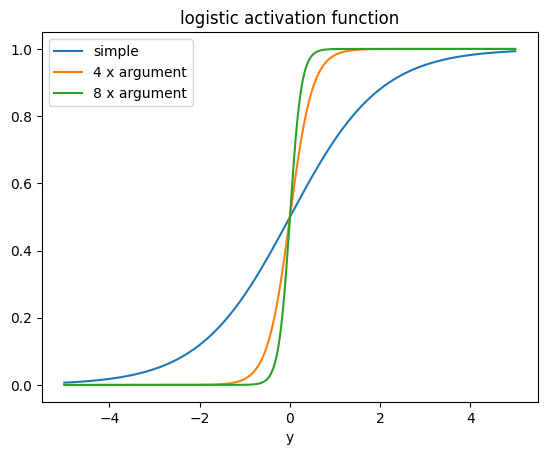

In [5]:
def s(x):
    return 1/(1 + np.exp(-x))

plt.xlabel('x')
plt.xlabel('y')
plt.title("logistic activation function")
plt.plot(xdomain, s(xdomain), label="simple")
plt.plot(xdomain, s(4*xdomain), label="4 x argument")
plt.plot(xdomain, s(8*xdomain), label="8 x argument")
plt.legend()

* Tangente hiperbolica $y=\text{tanh}(x)$.

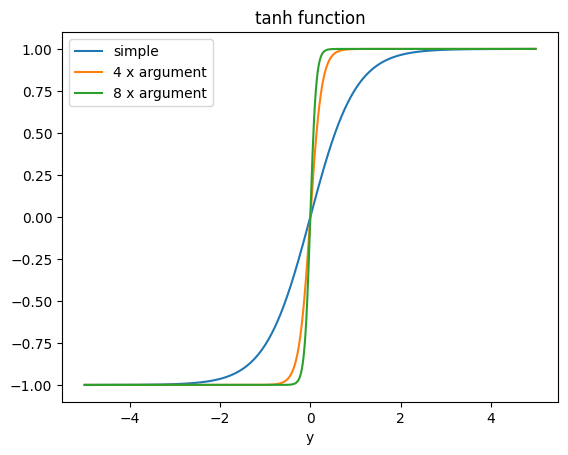

In [6]:
def t(x):
    return np.tanh(x)

plt.xlabel('x')
plt.xlabel('y')
plt.title("tanh function")
plt.plot(xdomain, t(xdomain), label="simple")
plt.plot(xdomain, t(4*xdomain), label="4 x argument")
plt.plot(xdomain, t(8*xdomain), label="8 x argument")
plt.legend()

* ReLU: Rectfied linear unit.

$$\text{ReLu}(x) = \left \{  \begin{array}{cc}  x & \text{si } x \ge 0  \\ 0 & \text{if } x < 0   \end{array}   \right . .$$

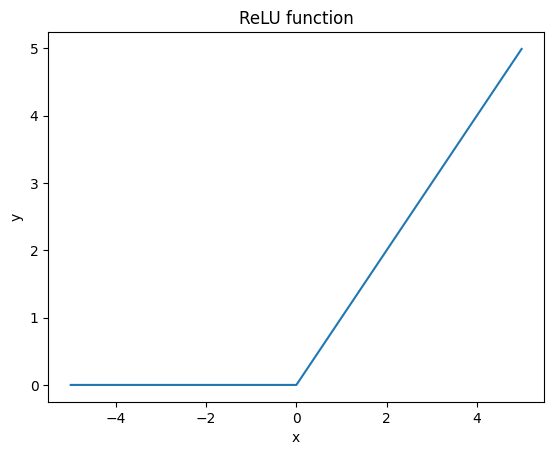

In [7]:
# relu
import matplotlib.pyplot as plt

def ReLU(x):
    if x >= 0 :
        return x
    else:
        return 0

xdomain = np.arange(-5,5, 0.01)
y = [ReLU(x) for x in xdomain]

plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU function')

plt.plot(xdomain, y)

Otras son
* Leaky ReLU en vez de 0 a la izquierda tiene una linea $y=ax$, donde $a$ es pequenho.

* La exponential linear unit ELU. Ivestigar estas.
Ver
[Keras](https://keras.io/api/layers/activations/) para otras mas.

# Forward Propagation (Propagacion hacia adelante).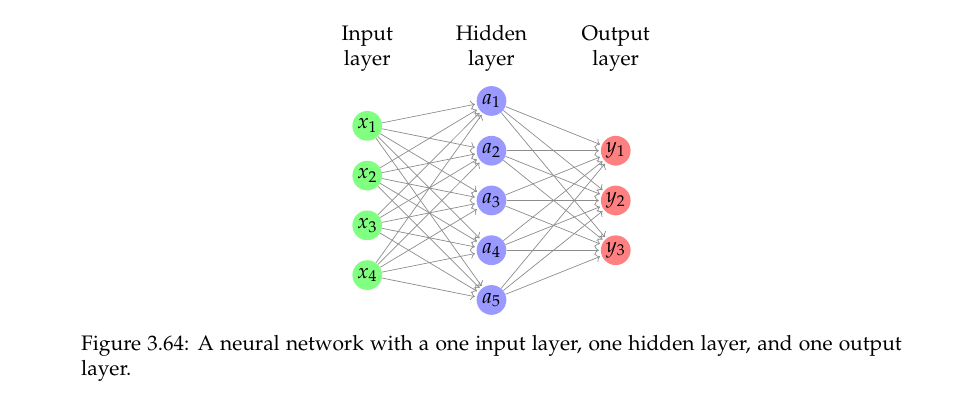

Para entender como se propaga la informacion en las redes neuronales comenzamos simple.

* un nodo de entrada
* un nodo oculto
* un nodo salida

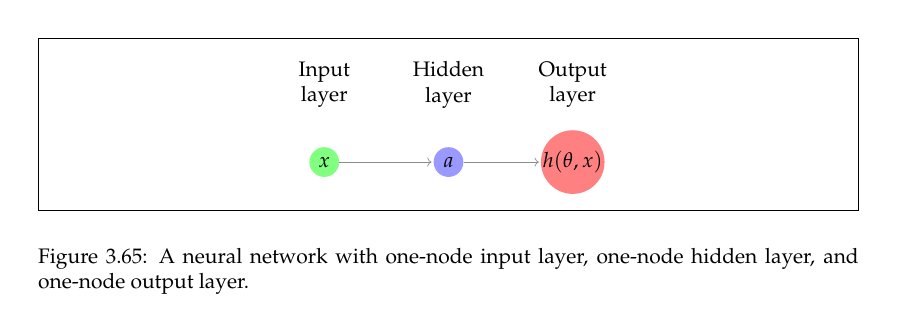

Este es el caso del operador logico "no"


| $$x$$ | $$\sum \theta_i x_i = - x $$ | $$ \ge \text{threshold} $$ | $$ \text{not  }  x$$
| ------ | ------------- | ----------------| -------------- |
| 1 | 0 | 0 | 1 |
| 1 | -1 | 0 | 0 |



La propagacion funciona asi:

## Un nodo de entrada, uno oculto ,  un nodo de salida

* Los datos entrada (solo $x$). Se pesan con el peso $\theta^{(1)}$, para obtener $z^{(2)}=x \theta^{(1)}$.

* Se le aplica a $z_2$ la funcion de activacion. En este caso vamos a usar la sigmoid (pero puede ser cualquier otra).


$$ a^{(2)}= S(z^{(2)}) = \frac{1}{1+ \mathrm{e}^{-z^{(2)}}} .$$

* Usamos la activacion en este con una combinacion lineal $z^{(3)}= a^{(2)} \theta^{(2)}$ y  finalmente
obtenemos la hipotesis.

* Tenemos
$$h(\theta, x) = S(z^{(3)}) = \frac{1}{1+ \mathrm{e}^{-z^{(3)}}} .$$

# Varios nodos de entrada, uno oculto y uno de salida.

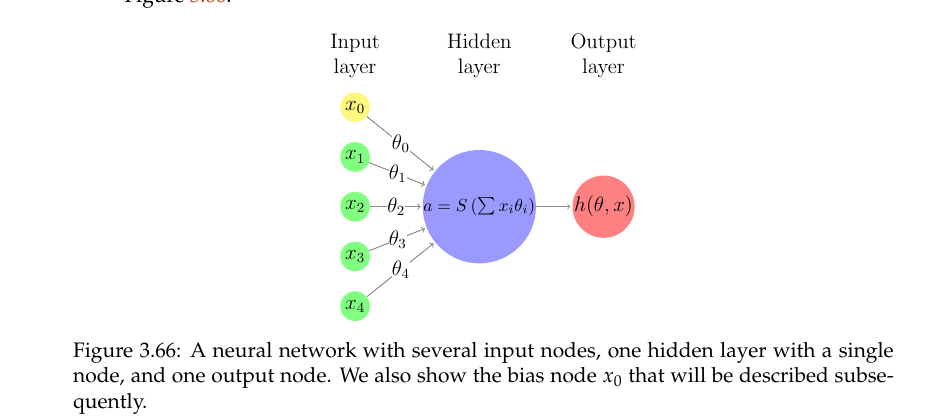

Los siguientes son los pasos de como se propaga la informacion en este caso.

* Los datos de entrada se pesan con los $\theta^{(1)}$ de la siguiente forma. Es el producto punto del vector de entrada por los pesos.


$$ z^{(2)} = x_0 \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 + x_4 \theta_4  .$$

* Aplicamos la funcion de activacion
$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} $$

* Aplicamos el producto con los pesos (es uno solo)

$$ z^{(3)}= a^{(2)} \theta^{(2)}. $$

* Finalmente la hipotesis es la activacion de este nodo.

$$h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} .$$

En general, la operacion para llegar al segundo nodo la podemos escribir como

$$ z^{(2)}(\Theta, x) = \sum_{j=0}^n x_j \theta_j = x^T \Theta .$$
donde $\Theta$ es el vector de pesos.

# Varios nodos de entrada, varios nodos ocultos y uno de salida

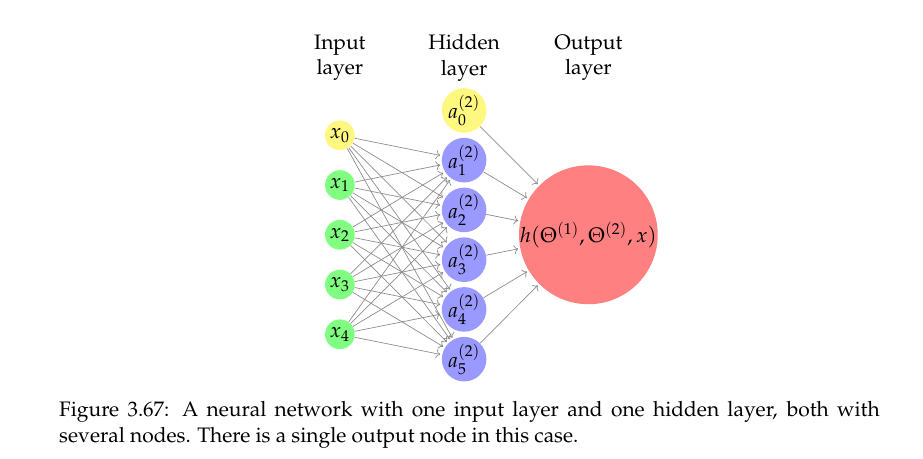


Los nodos ocultos son $p=5$ y el "bias" (amarillo)
Cada activacion $a_i$, $i=1,2,3,4,5$ recibe informacion de todos los nodos de entrada.
Veamos como podemos propagar esta informacion.

* La capa oculta.

\begin{eqnarray}
z_1^{(2)} = \sum_{j=0}^{n} x_j \theta_{j1}^{(1)}
\end{eqnarray}
Vector de entrada por la primera columna de $\Theta^{(1)}$
De igual forma

\begin{eqnarray}
z_2^{(2)} = \sum_{j=0}^{n} x_j \theta_{j2}^{(1)}
\end{eqnarray}
Vector de entrada por la segunda columna de $\Theta^{(1)}$

Y asi suscesivamente hasta

\begin{eqnarray}
z_5^{(2)} = \sum_{j=0}^{n} x_j \theta_{j5}^{(1)}
\end{eqnarray}
Vector de entrada por la quinta columna de $\Theta^{(1)}$

En general, podemos escribir esto de forma matricial y decir que

$$z^{(2)} = x^T \Theta^{(1)} .$$


El anterior $z^{(2)}$ es vector fila, si lo quiere columna no hay problema $(\Theta^{(1)})^T x$ es un vector columna con las mismas entradas.

Activamos la capa oculta.

\begin{eqnarray}
a_0^{(2)} &=& 1 \\
a_i^{(2)} &=& \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}}
\quad , \quad i=1,2, \cdots, p
\end{eqnarray}
en nuestro caso (figura) $p=5$.

* Construimos ahora $z^{(3)}$,
$$z^{(3)} = \sum_{j=0}^p a_j^{(2)} \theta_j^{(2)} = {A^{(2)}}^T \Theta^{(2)} .$$

* Finalmente construimos la hipotesis como

$$h(\Theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} .$$


##  Varios nodos de entrada, varios ocultos, varios de salida.
\begin{eqnarray}
a_0^{(2)} &=& 1 \\
a_i^{(2)} &=& \frac{1}{1 + \mathrm{e}^{-z_i^{(2)}}}
\quad , \quad i=1,2, \cdots, p
\end{eqnarray}
en nuestro caso (figura) $p=5$.

* Construimos ahora $z^{(3)}$,
$$z_i^{(3)} = \sum_{j=0}^p a_j^{(2)} \theta_{ij}^{(2)} = {A^{(2)}}^T \Theta^{(2)} .$$

* Tenemos varios $z_i$
Obtenemos varias hipotesis (multiclase)

$$h_i(\Theta, x) = \frac{1}{1 + \mathrm{e}^{-z_i{(3)}}}  \quad i=1,2,3 .$$


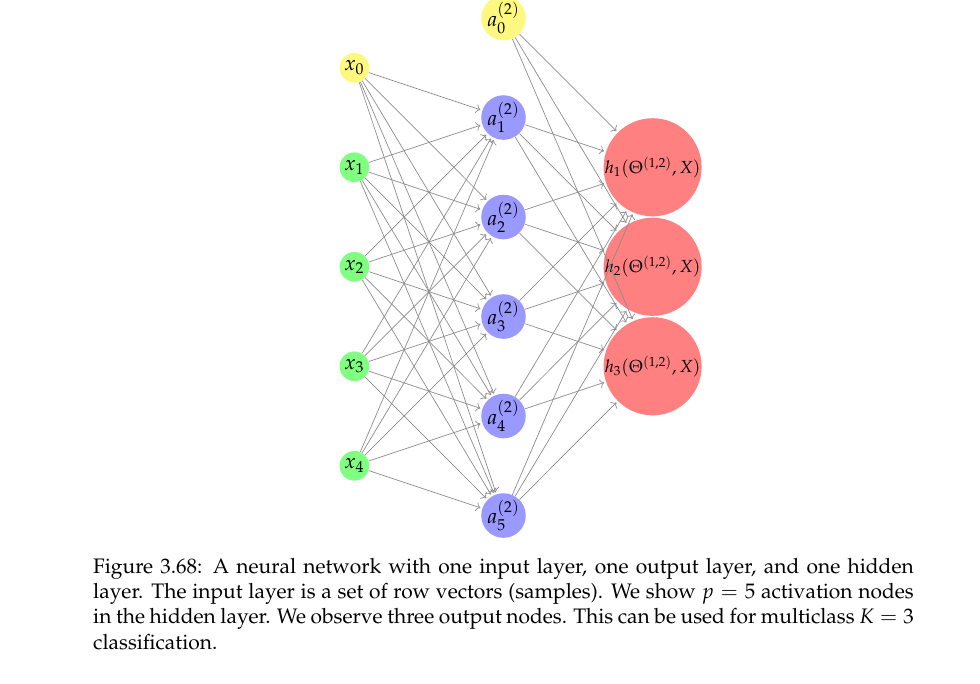

Suponga que los datos de entrada son vectores (formando una matriz) . Por ejemplo los canales de imagenes (RGB). En este caso generalizamos como sigue.

* Para la capa del medio

$$z_{ij}^{(2)} = \sum_{k=0}^n x_{ik} \theta_{kj}^{(1)} \quad i=1,2, \cdots, m \quad, \quad j=0,1, \cdots, p  .$$
Esto lo podemos escribir en forma matricial como

$$Z^{(2)} = X \Theta^{(1)}  .$$
con dimensiones
$$Z_{m \times {p+1}}^{(2)} = X_{m \times n} \Theta_{n \times (p+1})^{(1)} .$$
Una vez tengamos los $z$'s obtenemos los $a$'s con activaciones.

\begin{eqnarray}
a_{ij}^{(2)} = \frac{1}{1 + \mathrm{e}^{-z_{ij}^{(2)}}}
\end{eqnarray}

O en forma matricial


$$ A^{(2)} = \frac{1}{1 + \mathrm{e}^{-Z^{(2)}}} .$$

Con esto procedemos a definir la hipotesis para multiclase y matriz de entrada.


$$h_j^{(i)}(\Theta^{(2)}, A^{(2)}) = \frac{1}{1 + \mathrm{e}^{-\sum_{k=0}^p a_{ik}^{(2)} \theta_{kj}^{(2)}}} .$$

Que es el "bias" (sesgo?)

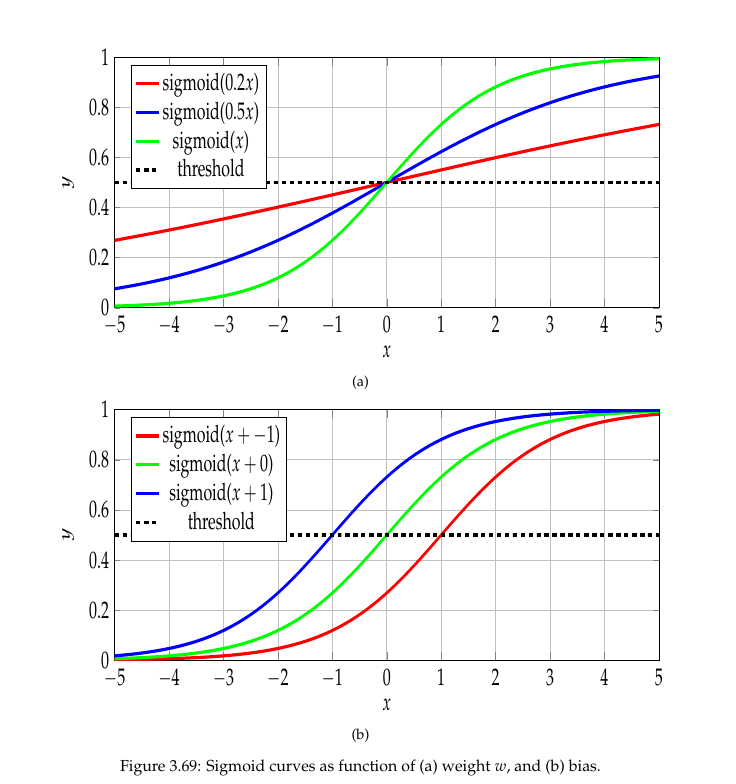

Decir que no hay "bias" es como decir que todas las activaciones pasan por el origen y esto es una gran limitante. No es lo mismo $y=ax+ b$, $y=ax$.

[StackOverflow Importancia del Bias](https://stackoverflow.com/questions/2480650/what-is-the-r)

Estamos listos para mostrar el algoritmo de la propagacion hacia adelante (Forward Propagation)

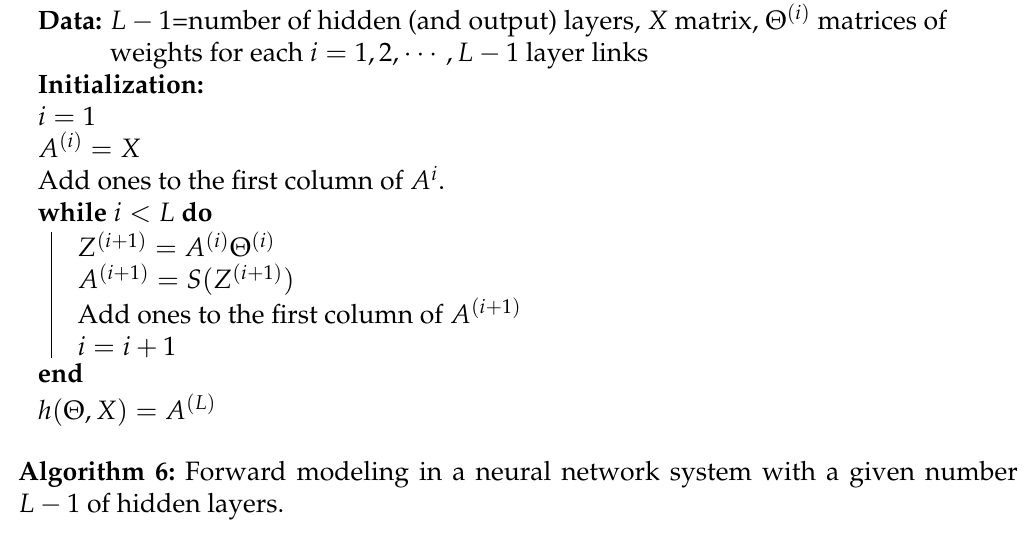

Recuerden la tabla del XOR.

| $$x_1$$ | $$x_2$$ | $$ \sum \theta_i x_i = x_1 + x_2 $$ | $$ \ge \text{threshold} $$ | $$ x_1 \text{ xor } x_2 $$ |
| ------ | ----- |:----:|:-----:|:-----:|
| 1 | 1 | 2 | ? | 0 |
| 1 | 0 | 1 | ? | 1 |
| 0 | 1 | 1 | ? | 1 |
| 0 | 0 | 0 | ? | 0 |



Este operador logico XOR no se puede simular con una sola capa como lo hicimos con los demas. Necestiamos una capa adicional.
Una oculta.

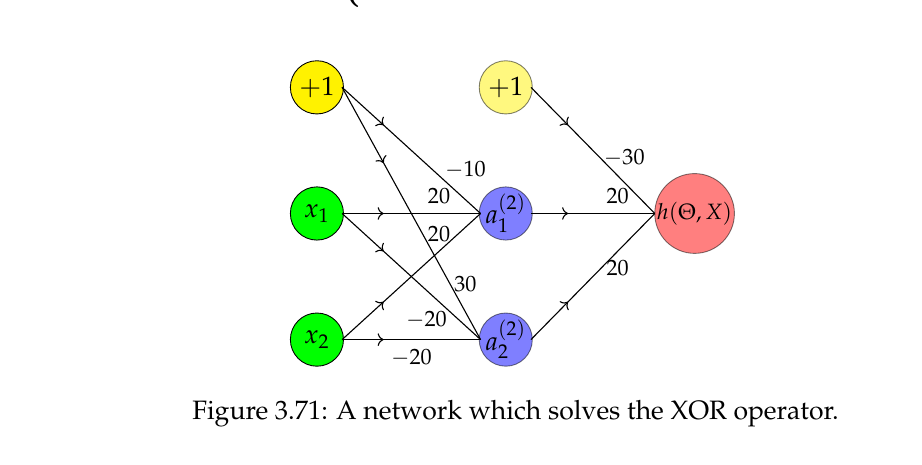


Como  ejemplo vamos a propagar la rede neuronal de la figura 3.71 (arriba) y ver que esta simula exactamente el operador XOR.

La activacion al final cumple la siguiente condicion.


\begin{eqnarray}
y = \left \{
\begin{array}{cc}
1  & \text{si } h(\Theta, X) \ge \text{umbral} \\
0  & \text{si } h(\Theta, X) < \text{umbral}
\end{array}
    \right .
\end{eqnarray}
El umbral lo escogemos como $0.5$.

La proxima clase propagamos esta red hacia adelante y verificamos que genera el operador logico XOR.
